In [0]:
##Page 23
##Page 24
##Page 25
##Page 26

In [82]:
!wget -c 'https://www.ece.rice.edu/~wakin/images/lena512.bmp'
!wget -c 'https://raw.githubusercontent.com/bistaumanga/DIP_Algorithms/master/samples/mandril_gray.tif'

--2020-03-22 03:26:36--  https://www.ece.rice.edu/~wakin/images/lena512.bmp
Resolving www.ece.rice.edu (www.ece.rice.edu)... 128.42.246.177
Connecting to www.ece.rice.edu (www.ece.rice.edu)|128.42.246.177|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2020-03-22 03:26:38--  https://raw.githubusercontent.com/bistaumanga/DIP_Algorithms/master/samples/mandril_gray.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262750 (257K) [image/tiff]
Saving to: ‘mandril_gray.tif’

mandril_gray.tif    100%[===================>] 256.59K  --.-KB/s    in 0.05s   

2020-03-22 03:26:38 (4.94 MB/s) - ‘mandril_gray.tif’ saved [262750/262750]



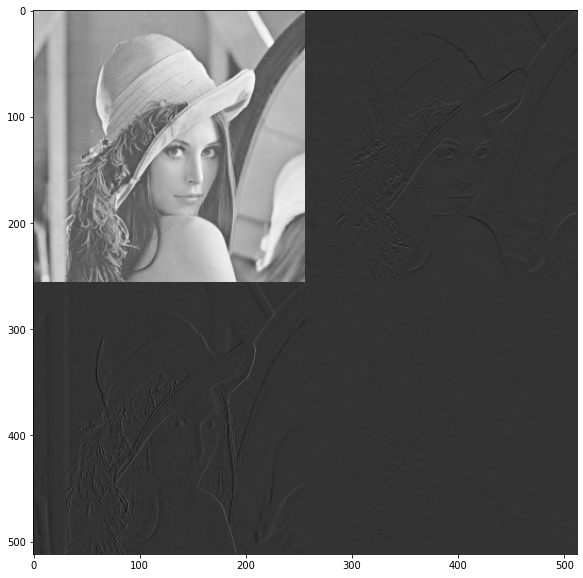

In [76]:
##Page 23
%matplotlib inline

import numpy as np
import pywt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

I = plt.imread('lena512.bmp')
coeffs = pywt.dwt2(I, 'haar')
cA, (cH, cV, cD) = coeffs


##concatenation of mask and compressedimage
new_im = np.zeros((I.shape),dtype=np.float32)
row1 = np.concatenate((cA, cH), axis=1)
row2 = np.concatenate((cV, cD), axis=1)
new_im = np.concatenate((row1, row2), axis=0)

plt.imshow(new_im,'gray')
plt.show()



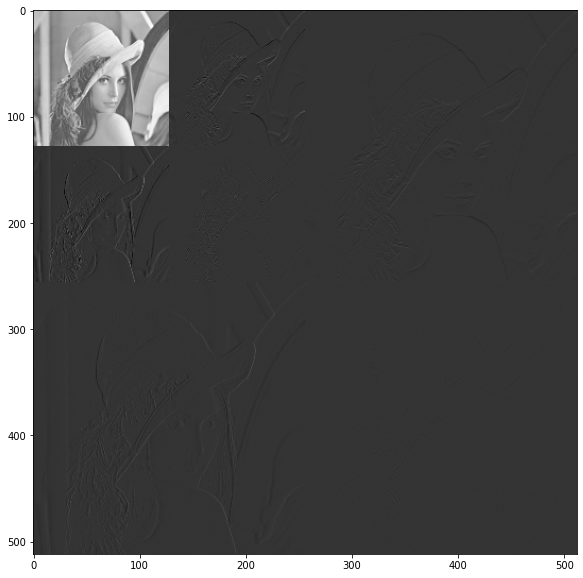

In [81]:
##Page 23
%matplotlib inline

import numpy as np
import pywt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

I = plt.imread('lena512.bmp')
coeffs = pywt.dwt2(I, 'haar')
cA1, (cH1, cV1, cD1) = coeffs
coeffs = pywt.dwt2(cA1, 'haar')
cA2, (cH2, cV2, cD2) = coeffs

##concatenation of mask and compressedimage
new_im = np.zeros(((int)(I.shape[0]/2),(int)(I.shape[1]/2)),dtype=np.float32)
row1 = np.concatenate((cA2, cH2), axis=1)
row2 = np.concatenate((cV2, cD2), axis=1)
new_im_lvl_2 = np.concatenate((row1, row2), axis=0)

new_im = np.zeros((I.shape),dtype=np.float32)
row1 = np.concatenate((new_im_lvl_2, cH1), axis=1)
row2 = np.concatenate((cV1, cD1), axis=1)
new_im = np.concatenate((row1, row2), axis=0)

plt.imshow(new_im,'gray')
plt.show()



/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Casting input data from 'float128' to 'float64' for imshow
  fig.canvas.print_figure(bytes_io, **kw)


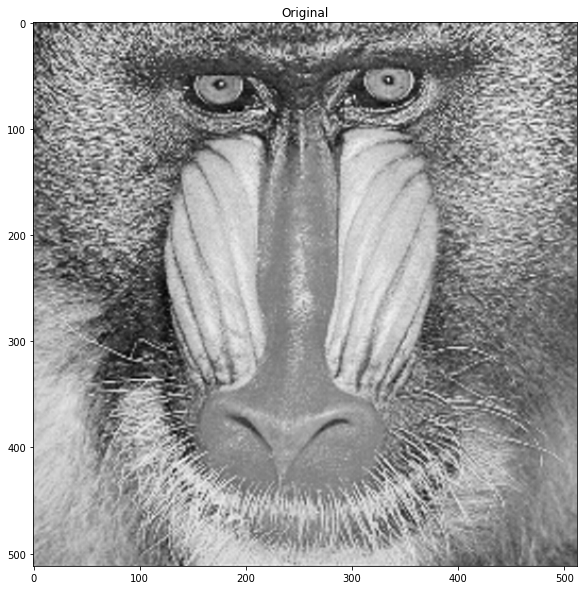

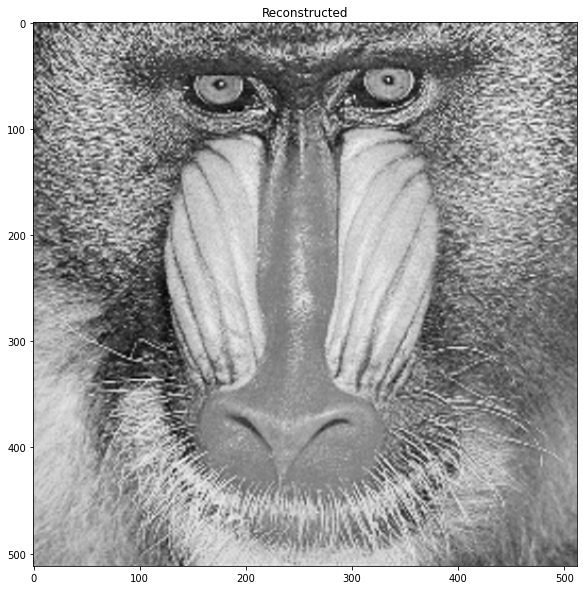

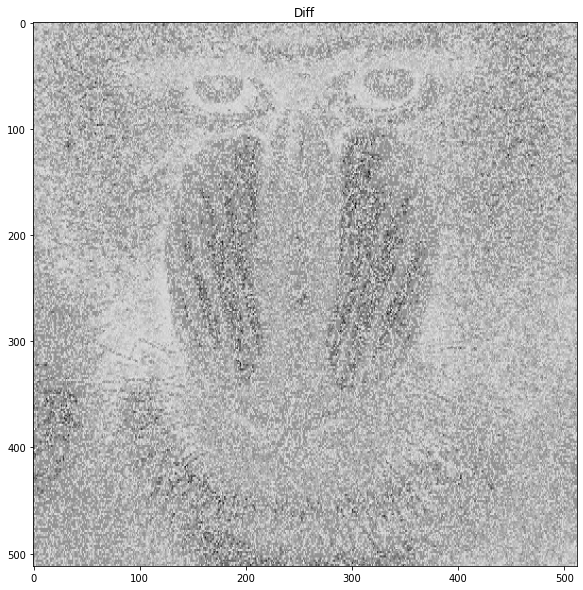

1.7053025658242404461e-13


In [99]:
##Page 26
%matplotlib inline

import numpy as np
import pywt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

I = plt.imread('mandril_gray.tif')
I = I.astype(np.float128)
plt.imshow(I,'gray')
plt.title('Original')
plt.show()
cA1, (cH1, cV1, cD1) = pywt.dwt2(I, 'haar')
A0 = pywt.idwt2((cA1, (cH1, cV1, cD1)), 'haar')
plt.imshow(A0,'gray')
plt.title('Reconstructed')
plt.show()

plt.imshow(I-A0,'gray')
plt.title('Diff')
plt.show()

print(np.max(np.abs(I-(A0))))

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Casting input data from 'float128' to 'float64' for imshow
  fig.canvas.print_figure(bytes_io, **kw)


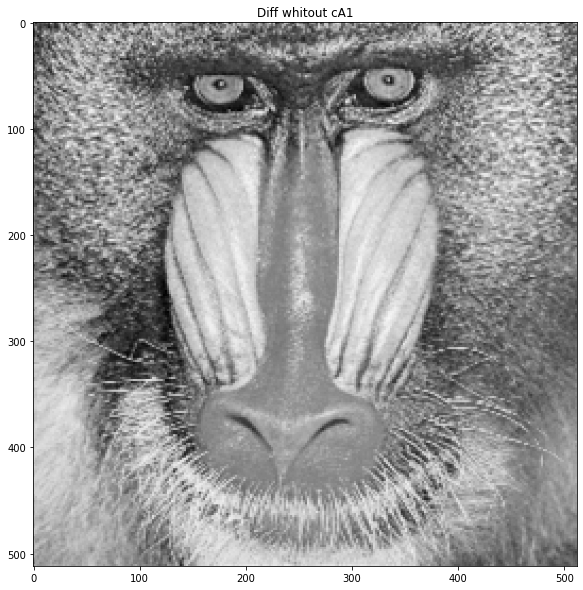

33680046.0


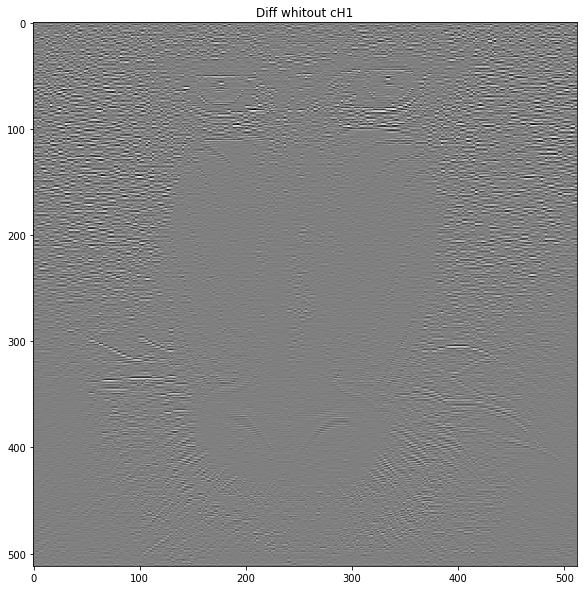

1448422.0000000002483


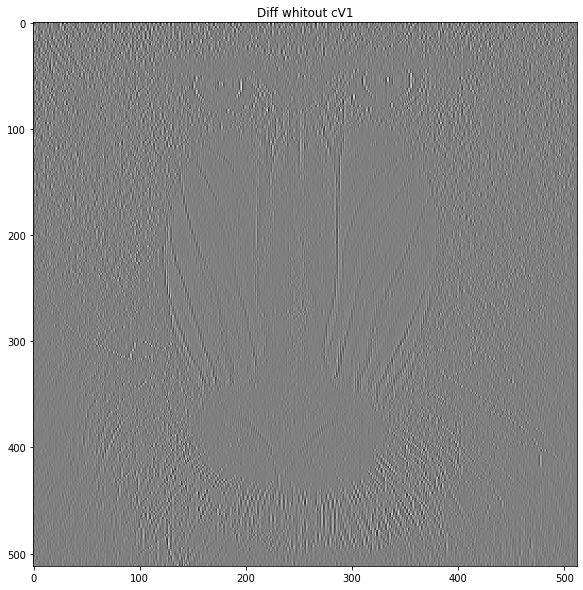

1237648.0000000002451


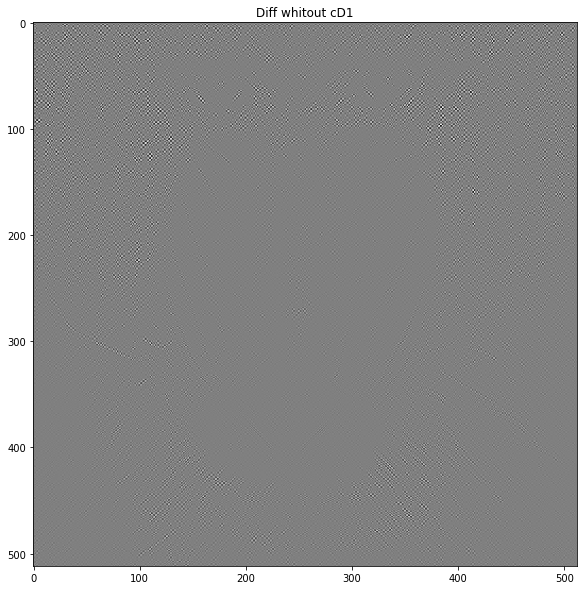

490596.00000000070403


In [104]:
##Page 27+
%matplotlib inline

import numpy as np
import pywt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

I = plt.imread('mandril_gray.tif')
I = I.astype(np.float128)
cA1, (cH1, cV1, cD1) = pywt.dwt2(I, 'haar')

A0 = pywt.idwt2((np.zeros((cA1.shape),dtype=np.float128), (cH1, cV1, cD1)), 'haar')
plt.imshow(I-A0,'gray')
plt.title('Diff whitout cA1')
plt.show()
print(np.sum(np.abs(I-(A0))))

A0 = pywt.idwt2((cA1, (np.zeros((cA1.shape),dtype=np.float128), cV1, cD1)), 'haar')
plt.imshow(I-A0,'gray')
plt.title('Diff whitout cH1')
plt.show()
print(np.sum(np.abs(I-(A0))))

A0 = pywt.idwt2((cA1, (cH1, np.zeros((cA1.shape),dtype=np.float128), cD1)), 'haar')
plt.imshow(I-A0,'gray')
plt.title('Diff whitout cV1')
plt.show()
print(np.sum(np.abs(I-(A0))))

A0 = pywt.idwt2((cA1, (cH1, cV1, np.zeros((cA1.shape),dtype=np.float128))), 'haar')
plt.imshow(I-A0,'gray')
plt.title('Diff whitout cD1')
plt.show()
print(np.sum(np.abs(I-(A0))))